# Proyek Analisis Data: Air Quality di Distrik Huairou
- **Nama:** Elvan Nasrul
- **Email:** elopvan23@gmail.com
- **ID Dicoding:** elvan_nasrul

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagimana tren konsentrasi PM2.5 di udara di distrik Huairou sepanjang waktu?
- Pertanyaan 2 : Pada jam berapa dalam sehari konsentrasi PM2.5 di udara distrik Huairou mencapai angka tertinggi?
- Pertanyaan 3 : Bulan mana yang menunjukkan peningkatan tertinggi dalam konsentrasi PM2.5 di distrik Huairou?
- Pertanyaan 4 : Bagaimana pengaruh faktor lingkungan terhadap jumlah konsentrasi PM2.5 di distrik Huairou?
- Pertanyaan 5 : Bagimana pergerakan PM2.5 berdasarkan arah mata angin di distrik Huairou?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Data Wrangling

### 1.1 Gathering Data

#### Pertama, kita perlu mengumpulkan data terkait kualitas di distrik Huairou. Data ini bisa didapat dari berbagai sumber, seperti stasiun pengukuran kualitas udara atau dataset publik. Dalam konteks ini, kita akan menggunakan dataset yang sudah tersedia dari Dicoding.

In [6]:
# Membaca dataset
data = pd.read_csv('Data/PRSA_Data_Huairou_20130301-20170228.csv')

In [7]:
# Menampilkan 5 baris pertama dari dataset
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


### 1.2 Assesing Data

#### Setelah membaca data, kita perlu menilai data sebelum dilakukan analisis lebih lanjut. Di sini kita akan mengecek apakah data sudah layak untuk dianalisis dengan meninjau beberapa hal, seperti apakah adanya missing value, duplikat data dan yang lainnya.

In [8]:
print("Info dataset distrik Huairou")
data.info()

Info dataset distrik Huairou
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [9]:
print("Data deskriptif distrik Huairou")
data.describe()

Data deskriptif distrik Huairou


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [10]:
print("Missing values dataset distrik Huairou")
print(data.isna().sum())

Missing values dataset distrik Huairou
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


In [11]:
print("Duplicate dataset distrik Huairou: ", data.duplicated().sum())

Duplicate dataset distrik Huairou:  0


**Insight:**
- Tidak ada duplicate data di dataset distrik Huairou

### 1.3 Cleaning Data

#### Setelah dilakukan assesing atau penilaian data, selanjutnya kita akan melakukan cleaning data untuk membersihkan data dari beberapa hal yang tidak sesuai yang telah kita dapatkan pada tahap assesing data untuk proses analisis.

In [12]:
# Menghapus kolom yang memiliki missing values di kolom TEMP, PRES, DEWP, RAIN, wd, dan WSPM.
# Hal ini dilakukan karena data yang memiliki missing values di kolom tersebut bisa dibilang sedikit
# Apabila dibandingankan dengan keseluruhan data.
data = data.dropna(subset=['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'])

In [13]:
# Mengisi missing values pada kolom numerik (PM2.5, PM10, SO2, NO2, CO, O3) dengan nilai rata-rata.
# Berbeda dengan data kategorikal sebelumnya, di sini kita mengisi missing values dengan nilai rata-rata.
# Hal ini karena data yang memiliki missing value di kolom numerik ini cukup banyak.
# Sehingga alih-alih menghapus data, di sini kita isi data dengan nilai lain yaitu nilai rata-rata.
data['PM2.5'].fillna(data['PM2.5'].mean(), inplace=True)
data['PM10'].fillna(data['PM10'].mean(), inplace=True)
data['SO2'].fillna(data['SO2'].mean(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['CO'].fillna(data['CO'].mean(), inplace=True)
data['O3'].fillna(data['O3'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20220\3381394419.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM2.5'].fillna(data['PM2.5'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20220\3381394419.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [14]:
# Memastikan tidak ada lagi missing value
print(data.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Setelah dilakukan cleaning, sekarang data tidak memiliki mising value yang menjadi permasalahan kita sebelumnya. Itu artinya sekarang data sudah siap diexplore.

## Exploratory Data Analysis (EDA)

#### Setelah membersihkan data, langkah selanjutnya adalah menjelajahi dataset untuk mendapatkan temuan unik berdasarkan pertanyaan yang telah kita buat sebelumnya.

##### Pertama, kita akan menyusun kolom waktu untuk melihat bagaimana konsentrasi ini berubah dari waktu ke waktu.

In [15]:
# Mengonversi kolom tahun, bulan, tanggal menjadi tipe datetime
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

In [16]:
# Menyusun ulang data untuk analisis tren
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

#### Selanjutnya, kita akan memeriksa pola konsentrasi PM2.5 sepanjang hari dengan mengelompokkan data berdasarkan jam. Kemudian menghitung rata-rata konsentrasi PM2.5 untuk setiap jam.

In [17]:
# Mendefinisikan kolom jam
data['hour'] = data['hour']

# Menghitung rata-rata PM2.5 per jam
hourly_avg = data.groupby('hour')['PM2.5'].mean().reset_index()
print(hourly_avg)

    hour      PM2.5
0      0  74.153405
1      1  73.086301
2      2  69.533207
3      3  67.431815
4      4  64.460236
5      5  62.737559
6      6  60.884116
7      7  61.199727
8      8  63.471203
9      9  66.856369
10    10  67.984397
11    11  67.346563
12    12  66.272230
13    13  66.027722
14    14  65.687711
15    15  66.884998
16    16  67.206076
17    17  69.272025
18    18  72.467932
19    19  78.121170
20    20  81.661208
21    21  80.405345
22    22  78.215484
23    23  76.099190


#### Selanjutnya kita akan menganalisis data bulanan untuk menemukan bulan-bulan dengan konsentrasi PM2.5 yang tinggi. Di sini juga akan dihitung rata-rata konsentrasi bulanan.

In [18]:
# Mendefinisikan kolom bulan
data['month'] = data['month']

# Menghitung rata-rata PM2.5 per bulan
monthly_avg = data.groupby('month')['PM2.5'].mean().reset_index()
print(monthly_avg)

    month      PM2.5
0       1  78.547452
1       2  79.976429
2       3  89.083928
3       4  67.239992
4       5  56.424516
5       6  56.663027
6       7  67.227034
7       8  47.988465
8       9  54.875614
9      10  79.180402
10     11  76.188460
11     12  80.807548


#### Untuk selanjutnya kita akan mengeksplorasi hubungan antara konsentrasi PM2.5 dan faktor lingkungan lainnya, seperti suhu, kelembapan dan faktor lainnya. 

In [19]:
# Menghitung korelasi antara PM2.5 dan faktor lingkungan
correlation_matrix = data[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'TEMP', 'PRES',
                         'DEWP', 'RAIN', 'WSPM']].corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879122  0.407136  0.646240  0.790297 -0.061053 -0.076794   
PM10   0.879122  1.000000  0.405716  0.632018  0.702515  0.014009 -0.008265   
SO2    0.407136  0.405716  1.000000  0.529078  0.415726 -0.062396 -0.218152   
NO2    0.646240  0.632018  0.529078  1.000000  0.710573 -0.335311 -0.328383   
CO     0.790297  0.702515  0.415726  0.710573  1.000000 -0.241234 -0.254169   
O3    -0.061053  0.014009 -0.062396 -0.335311 -0.241234  1.000000  0.562080   
TEMP  -0.076794 -0.008265 -0.218152 -0.328383 -0.254169  0.562080  1.000000   
PRES  -0.004606 -0.070870  0.180634  0.218418  0.136163 -0.418335 -0.821179   
DEWP   0.121822  0.109954 -0.232268 -0.156816 -0.017126  0.288930  0.817832   
RAIN  -0.012224 -0.009802 -0.035928 -0.047546 -0.005620  0.025970  0.042965   
WSPM  -0.216302 -0.126671 -0.092666 -0.270723 -0.253600  0.262682  0.082207   

           PRES      DEWP      RAIN      WSPM  
PM2

#### Terakhir kita akan mengeksplorasi bagaimana pergerakan polusi berdasarkan arah mata angin yang tersedia dalam data di distrik Huairou.

In [20]:
# Menampilkan data arah angin
print(data['wd'].unique())

['WNW' 'NNW' 'NW' 'N' 'NNE' 'NE' 'ESE' 'SE' 'W' 'S' 'ENE' 'E' 'SSE' 'WSW'
 'SW' 'SSW']


In [21]:
# Menghitung rata-rata PM2.5 berdasarkan arah angin
wind_avg = data.groupby('wd')['PM2.5'].mean().reset_index()
print(wind_avg)

     wd      PM2.5
0     E  63.586641
1   ENE  57.193397
2   ESE  69.319217
3     N  62.066910
4    NE  56.512176
5   NNE  58.041972
6   NNW  62.137955
7    NW  71.956337
8     S  76.058083
9    SE  77.432828
10  SSE  83.029972
11  SSW  70.567158
12   SW  78.027640
13    W  69.312335
14  WNW  74.942609
15  WSW  74.036544


**Insight:**
- Mengonversi kolom tanggal menjadi tipe datetime memungkinkan kita untuk melakukan analisis berbasis waktu. Ini memudahkan kita untuk mengekstrak komponen tahun, bulan, dan hari yang akan digunakan dalam analisis lebih lanjut.
- Menghitung rata-rata konsentrasi PM2.5 per jam memberikan wawasan tentang bagaimana polusi bervariasi sepanjang hari. Ini membantu dalam memahami waktu-waktu tertentu ketika konsentrasi PM2.5 lebih tinggi atau lebih rendah.
- Analisis bulanan memberikan gambaran tentang fluktuasi konsentrasi PM2.5 berdasarkan waktu dalam setahun. Ini dapat menunjukkan pengaruh musim atau aktivitas tertentu terhadap kualitas udara.
- Menghitung korelasi membantu kita memahami hubungan antara konsentrasi PM2.5 dan faktor lingkungan lainnya. Korelasi yang kuat menunjukkan adanya hubungan yang signifikan antara variabel-variabel tersebut.
- Menampilkan nilai unik dari kolom arah angin membantu kita memahami variasi data yang ada. Menghitung rata-rata PM2.5 berdasarkan arah angin memberikan wawasan tentang sebaran PM2.5.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagimana tren konsentrasi PM2.5 di udara di distrik Huairou sepanjang waktu?

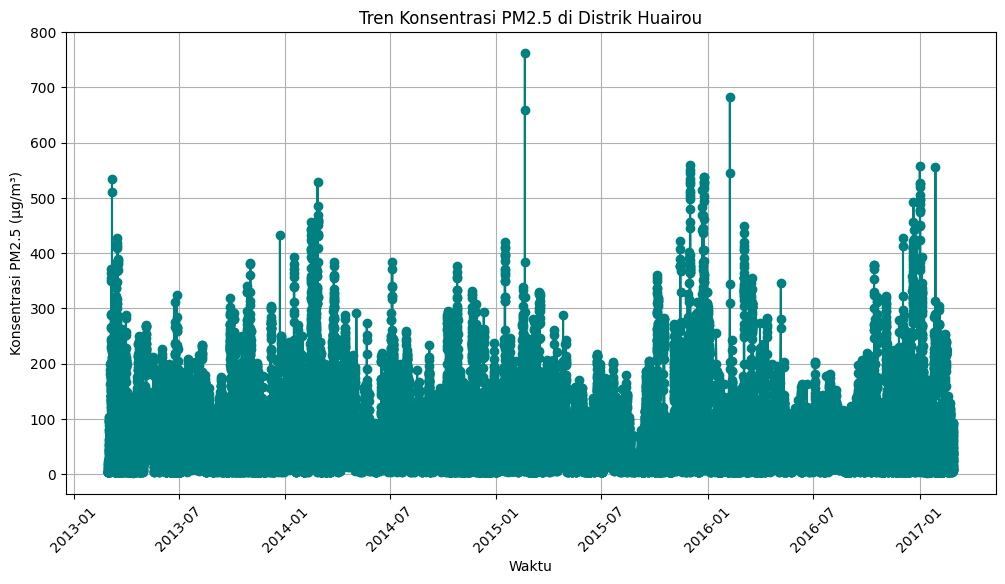

In [22]:
# Untuk menampilkan tren konsentrasi PM2.5 dari waktu ke waktu, kita akan membuat linechart.

# Plot tren konsentrasi PM2.5 sepanjang waktu
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['PM2.5'], marker='o', linestyle='-', color='Teal')
plt.title('Tren Konsentrasi PM2.5 di Distrik Huairou')
plt.xlabel('Waktu')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Pertanyaan 2: Pada jam berapa dalam sehari konsentrasi PM2.5 di udara distrik Huairou mencapai angka tertinggi?

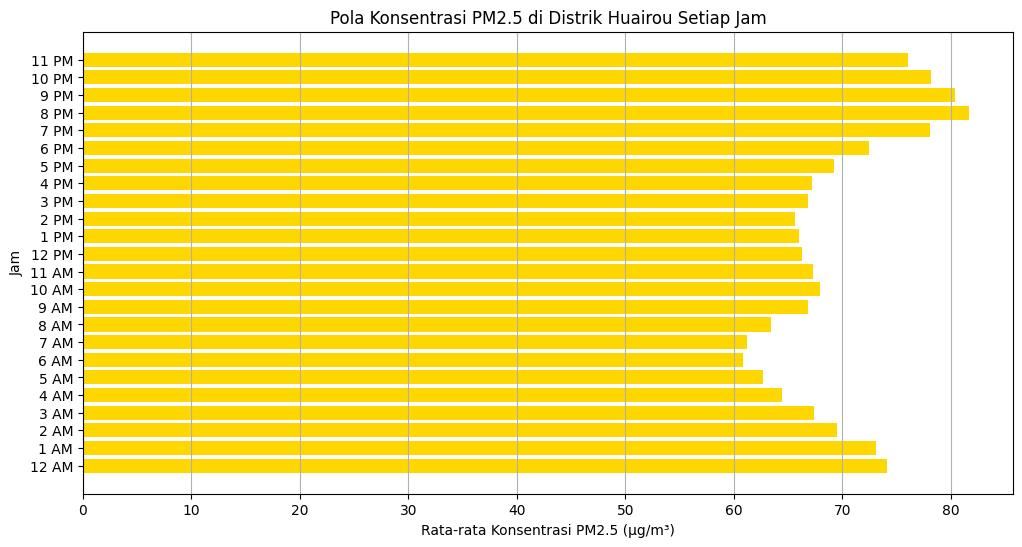

In [23]:
# Selanjutnya kita akan menampilkan konsentrasi PM2.5 setiap jamnya.

# Visualisasi pola konsentrasi PM2.5 berdasarkan jam menggunakan bar chart dan pertukaran sumbu
plt.figure(figsize=(12, 6))
plt.barh(hourly_avg['hour'], hourly_avg['PM2.5'], color='Gold')
plt.title('Pola Konsentrasi PM2.5 di Distrik Huairou Setiap Jam')
plt.ylabel('Jam')
plt.xlabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.yticks(range(24), ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM'])
plt.grid(axis='x')  
plt.show()

### Pertanyaan 3: Bulan mana yang menunjukkan peningkatan tertinggi dalam konsentrasi PM2.5 di distrik Huairou?

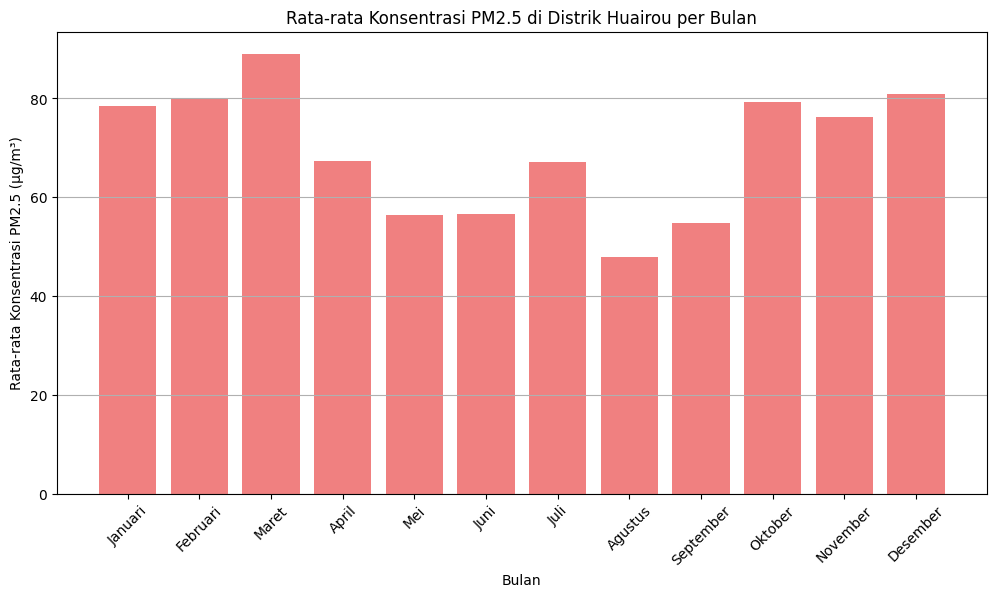

In [24]:
# Kemudian kita akan melihat bulan mana yang memiliki konsentrasi tertinggi di distrik Huariou.

## Visualisasi rata-rata konsentrasi PM2.5 per bulan
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg['month'], monthly_avg['PM2.5'], color='Lightcoral')
plt.title('Rata-rata Konsentrasi PM2.5 di Distrik Huairou per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.xticks(range(1, 13), ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=45)
plt.grid(axis='y')
plt.show()


### Pertanyaan 4: Bagaimana pengaruh faktor lingkungan terhadap jumlah konsentrasi PM2.5 di distrik Huairou?

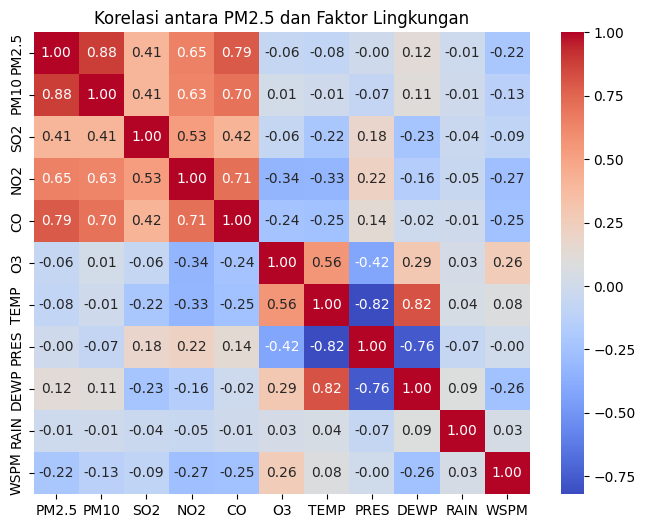

In [25]:
# Kita dapat menggunakan grafik heatmap untuk menunjukkan korelasi antara PM2.5 dan faktor lingkungan lainnya.

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara PM2.5 dan Faktor Lingkungan')
plt.show()

### Pertanyaan 5: Bagimana pergerakan PM2.5 berdasarkan arah mata angin di distrik Huairou?

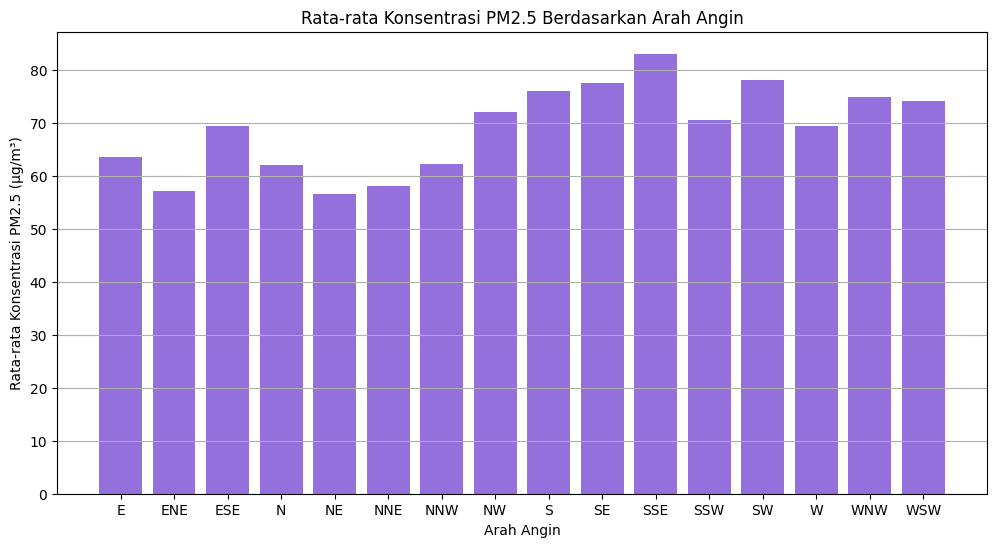

In [26]:
# Terakhir, kita akan menampilkan bagaimana bergerakan arah angin untuk konsentrasi PM2.5.

# Visualisasi rata-rata PM2.5 berdasarkan arah angin
plt.figure(figsize=(12, 6))
plt.bar(wind_avg['wd'], wind_avg['PM2.5'], color='Mediumpurple')
plt.title('Rata-rata Konsentrasi PM2.5 Berdasarkan Arah Angin')
plt.xlabel('Arah Angin')
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.grid(axis='y')
plt.show()

## Analisis Lanjutan (Opsional)

#### Sebagai analis lanjutan di sini saya akan mengelompokkan data yang telah divisualisasikan untuk mempermudah dalam menganalisis dan membaca data yang ada.

In [27]:
# Menentukan siang atau malam berdasarkan jam
def get_time_of_day(hour):
    if hour >= 6 and hour < 18:
        return 'Siang'
    else:
        return 'Malam'

# Menambahkan kolom siang/malam
data['time_of_day'] = data['hour'].apply(get_time_of_day)

# Menghitung rata-rata PM2.5 per siang/malam
time_of_day_avg = data.groupby('time_of_day')['PM2.5'].mean().reset_index()

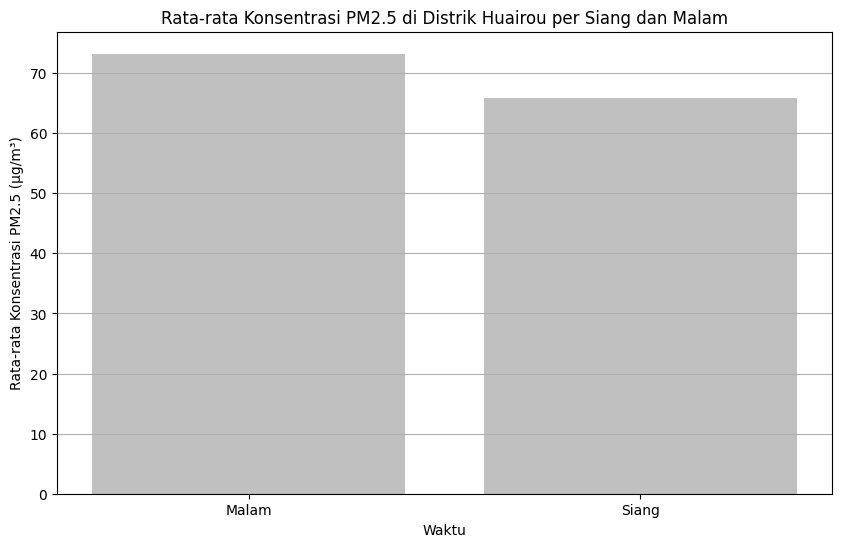

In [28]:
# Visualisasi rata-rata PM2.5 berdasarkan siang/malam
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_avg['time_of_day'], time_of_day_avg['PM2.5'], color='Silver')
plt.title('Rata-rata Konsentrasi PM2.5 di Distrik Huairou per Siang dan Malam')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.grid(axis='y')
plt.show()

In [29]:
# Menentukan musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:
        return 'Musim Dingin'
    elif month in [3, 4, 5]:
        return 'Musim Semi'
    elif month in [6, 7, 8]:
        return 'Musim Panas'
    else:
        return 'Musim Gugur'

# Menambahkan kolom musim
data['season'] = data['month'].apply(get_season)

# Menghitung rata-rata PM2.5 per musim
seasonal_avg = data.groupby('season')['PM2.5'].mean().reset_index()

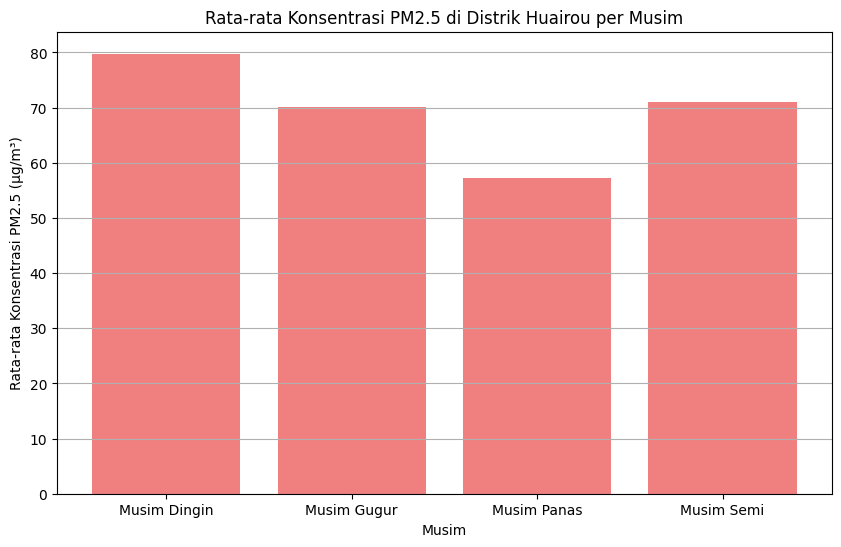

In [30]:
# Visualisasi rata-rata PM2.5 berdasarkan musim
plt.figure(figsize=(10, 6))
plt.bar(seasonal_avg['season'], seasonal_avg['PM2.5'], color='Lightcoral')
plt.title('Rata-rata Konsentrasi PM2.5 di Distrik Huairou per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Konsentrasi PM2.5 (µg/m³)')
plt.grid(axis='y')
plt.show()

## Conclusion

- Conclusion Pertanyaan 1 : Bagimana tren konsentrasi PM2.5 di udara di distrik Huairou sepanjang waktu?


   1. Variasi Konsentrasi: Terdapat fluktuasi yang signifikan dalam konsentrasi PM2.5 dari waktu ke waktu, dengan nilai yang bervariasi secara luas. Konsentrasi tertinggi tercatat mencapai lebih dari 700 µg/m³.   

   2. Tren Umum: Secara umum, meskipun terdapat puncak-puncak, tren keseluruhan konsentrasi PM2.5 menunjukkan kecenderungan untuk tetap tinggi di atas 200 µg/m³ dalam banyak periode, menunjukkan adanya masalah kualitas udara yang berkelanjutan.      

- Conclusion Pertanyaan 2 : Pada jam berapa dalam sehari konsentrasi PM2.5 di udara distrik Huairou mencapai angka tertinggi?

   1. Jam Puncak Konsentrasi: Konsentrasi PM2.5 mencapai angka tertinggi pada jam 8 PM, dengan konsentrasi PM2.5 di atas 80 µg/m³.

   2. Penurunan Konsentrasi: Setelah puncak pada jam 8 PM, konsentrasi PM2.5 mulai menurun secara perlahan hingga mencapai titik terendahnya sekitar jam 6 AM, di mana konsentrasi berkisar hampir menyentuh angka 60 µg/m³.

   3. Pengelompokkan waktu: Jika kita membagi konsentrasi PM2.5 berdasarkan malam dan siang, maka kita akan menemukan bahwa konsentrasi PM2.5 di malam hari lebih besar daripada di siang hari. Pada malam hari konsentrasi PM2.5 di atas 70 µg/m³, sedangkan pada siang hari konsentrasi PM2.5 berkisar antara 60 µg/m³ - 70 µg/m³.

  

- Conclusion Pertanyaan 3 : Bulan mana yang menunjukkan peningkatan tertinggi dalam konsentrasi PM2.5 di distrik Huairou?

   1. Bulan dengan Konsentrasi Tertinggi: Bulan Maret menunjukkan rata-rata konsentrasi PM2.5 tertinggi, mencapai lebih dari 80 µg/m³.

   2. Pola Bulanan: Secara keseluruhan, grafik menunjukkan bahwa konsentrasi PM2.5 cenderung lebih tinggi di bulan-bulan awal tahun, dengan Maret sebagai puncaknya, dan kemudian menurun.

   3. Pengelompokkan musim: Jika kita membagi konsentrasi PM2.5 berdasarkan musim yaitu musim dingin, semi, panas dan gugur. Maka kita akan menemukan bahwa konsentrasi PM2.5 tertinggi berada di musin dingin yaitu pada bulan Desember, Januari dan Februari dengan PM2.5 hampir menyentuh 80 µg/m³. Dan konsentrasi PM2.5 terendah berada pada musim panas yakni pada bulan Juni, Juli dan Agustus yaitu antara 50 µg/m³ - 60 µg/m³.


- Conclusion Pertanyaan 4 : Bagaimana pengaruh faktor lingkungan terhadap jumlah konsentrasi PM2.5 di distrik Huairou?

   1. PM10 memiliki korelasi sangat tinggi dengan PM2.5 (0.88). Ini menunjukkan bahwa peningkatan PM10 berkorelasi erat dengan peningkatan PM2.5, yang wajar karena kedua polutan ini berasal dari sumber yang mirip.

    2. CO (Karbon Monoksida) juga memiliki korelasi tinggi dengan PM2.5 (0.79). Ini menunjukkan bahwa polusi udara dari sumber pembakaran, seperti kendaraan bermotor dan industri, memiliki pengaruh besar terhadap konsentrasi PM2.5.

    3. NO2 (Nitrogen Dioksida) memiliki korelasi positif yang cukup kuat dengan PM2.5 (0.65). Ini menandakan bahwa peningkatan emisi dari kendaraan bermotor dan aktivitas industri yang mengeluarkan NO2 akan meningkatkan konsentrasi PM2.5.

   4. SO2 (Sulfur Dioksida) menunjukkan korelasi moderat dengan PM2.5 (0.41), yang berarti peningkatan SO2, yang biasanya berasal dari pembakaran bahan bakar fosil, juga berkaitan dengan peningkatan PM2.5 meski tidak sekuat PM10 atau CO.

   5. Faktor-faktor lingkungan seperti Temperatur (TEMP), Tekanan (PRES), dan Arah serta Kecepatan Angin (WSPM) memiliki korelasi yang lebih rendah dan negatif dengan PM2.5. Ini menunjukkan bahwa faktor-faktor cuaca ini tidak berkontribusi langsung dalam meningkatkan PM2.5, bahkan mungkin membantu mengurangi konsentrasi PM2.5 dengan meningkatkan penyebaran partikel polusi.

   6. Ozon (O3) memiliki korelasi yang sangat rendah dan negatif (-0.06) dengan PM2.5, yang menunjukkan bahwa ozon tidak memiliki pengaruh signifikan terhadap konsentrasi PM2.5 di distrik ini.
 
   Secara keseluruhan, faktor lingkungan yang paling memengaruhi konsentrasi PM2.5 adalah PM10, CO, dan NO2, yang semuanya terkait erat dengan polusi dari aktivitas manusia, seperti kendaraan dan industri. Sedangkan faktor cuaca (seperti temperatur, tekanan, dan angin) cenderung memiliki korelasi negatif dan tidak terlalu signifikan terhadap peningkatan PM2.5.

- Conclusion Pertanyaan 5 : Bagimana pergerakan PM2.5 berdasarkan arah mata angin di distrik Huairou?  

   1. Konsentrasi tertinggi PM2.5 tercatat ketika angin datang dari arah SSE (Selatan-Selatan-Timur) dan S (Selatan), dengan nilai mendekati atau sedikit di atas 80 µg/m³. Ini menunjukkan bahwa polusi cenderung lebih tinggi ketika angin bertiup dari arah selatan, mungkin karena sumber polusi yang signifikan berada di wilayah selatan.

   2. Arah angin NW (Barat-Laut) dan NNW (Utara-Barat-Laut) juga menunjukkan konsentrasi PM2.5 yang cukup tinggi, mendekati 70 µg/m³. Ini bisa berarti bahwa ada sumber polusi di barat laut yang juga berkontribusi terhadap peningkatan PM2.5.

   3. Konsentrasi PM2.5 lebih rendah ketika angin bertiup dari arah ENE (Timur-Timur-Laut), ESE (Timur-Timur-Selatan), dan NE (Timur Laut), dengan nilai sekitar 60 µg/m³ atau lebih rendah. Ini menunjukkan bahwa angin dari timur dan timur laut membawa lebih sedikit polusi atau membantu mendispersikan partikel polutan lebih baik.

   Secara keseluruhan, arah angin selatan dan barat laut berhubungan dengan konsentrasi PM2.5 yang lebih tinggi, sedangkan angin dari arah timur cenderung membawa udara yang lebih bersih atau menurunkan konsentrasi PM2.5 di distrik Huairou.

In [32]:
# Menyimpan dataset hasil analisis ke dalam file CSV
data.to_csv('Dasboard/main.csv', index=False)